In [ ]:
  !pip install --upgrade tensorflow_hub

Requirement already up-to-date: tensorflow_hub in /usr/local/lib/python3.6/dist-packages (0.10.0)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow_hub as hub
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
print(tf.__version__)


2.3.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
trash_dataset = "/content/drive/Shared drives/CSC340-AI-Project/Dataset.zip"

In [ ]:
import zipfile

with zipfile.ZipFile(trash_dataset, 'r') as z:
    z.extractall()

In [ ]:
import pathlib
trash_path = "/content/Dataset/train";
data_dir = pathlib.Path(trash_path)
train_path = "/content/Dataset/train"
train_dir = pathlib.Path(train_path)
test_path = "/content/Dataset/test"
test_dir = pathlib.Path(test_path)
print(data_dir)
print(train_dir)
print(test_dir)

/content/Dataset/train
/content/Dataset/train
/content/Dataset/test


In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

1241


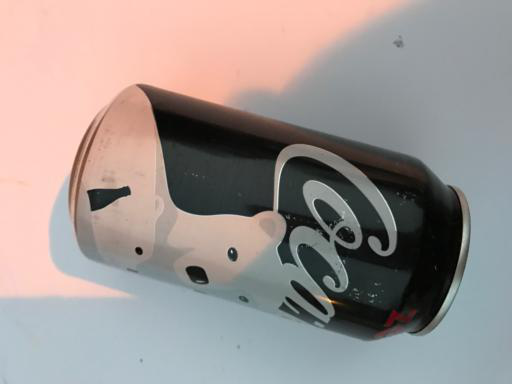

In [ ]:
RecycleWaste = list(train_dir.glob('RecycleWaste/*'))
PIL.Image.open(str(RecycleWaste[0]))

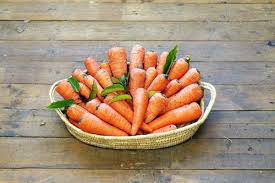

In [ ]:
CompostableWaste = list(data_dir.glob('CompostableWaste/*'))
PIL.Image.open(str(CompostableWaste[0]))

In [ ]:
import json 
with open('/content/Dataset/catergories.json','r') as f:
  cat_to_name = json.load(f)
  class_names = list(cat_to_name.values())

print (class_names)

['CompostableWaste', 'RecycleWaste']


In [ ]:
print('Number of classes:',len(class_names))

In [ ]:

IMAGE_SHAPE = (224, 224)

BATCH_SIZE = 64 



In [ ]:
# Inputs are suitably resized for the selected module.
validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    data_dir, 
    shuffle=False, 
    seed=42,
    color_mode="rgb", 
    class_mode="categorical",
    target_size=IMAGE_SHAPE,
    batch_size=BATCH_SIZE)
do_data_augmentation = True 
if do_data_augmentation:
  train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
      rescale = 1./255,
      rotation_range=40,
      horizontal_flip=True,
      width_shift_range=0.2, 
      height_shift_range=0.2,
      shear_range=0.2, 
      zoom_range=0.2,
      fill_mode='nearest' )
else:
  train_datagen = validation_datagen
  
train_generator = train_datagen.flow_from_directory(
    data_dir, 
    subset="training", 
    shuffle=True, 
    seed=42,
    color_mode="rgb", 
    class_mode="categorical",
    target_size=IMAGE_SHAPE,
    batch_size=BATCH_SIZE)

In [ ]:
model = tf.keras.Sequential([
  hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4", 
                 output_shape=[1280],
                 trainable=False),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dropout(rate=0.2),
  tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
])

In [ ]:
#Compile model specifying the optimizer learning rate

LEARNING_RATE = 0.001

model.compile(
   optimizer=tf.keras.optimizers.Adam(lr=LEARNING_RATE), 
   loss='categorical_crossentropy',
   metrics=['accuracy'])

In [ ]:
EPOCHS=10 

history = model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples//train_generator.batch_size,
        epochs=EPOCHS,
        validation_data=validation_generator,
        validation_steps=validation_generator.samples//validation_generator.batch_size)



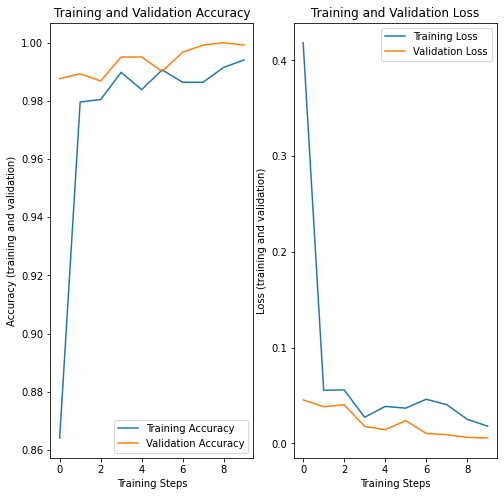

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.ylabel("Accuracy (training and validation)")
plt.xlabel("Training Steps")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.ylabel("Loss (training and validation)")
plt.xlabel("Training Steps")
plt.show()

Saving RecycleWaste-33.jpg to RecycleWaste-33.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
JPEG
RGB
(440, 401)


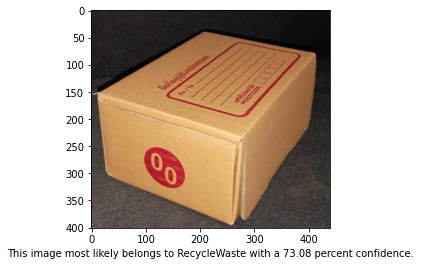

In [ ]:
from google.colab import files
uploads = files.upload()

from keras.preprocessing.image import load_img
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
from keras.preprocessing.image import save_img

for file in uploads.keys() :
  # load the image 
 img = load_img(file,target_size=IMAGE_SHAPE ) 
  # convert image to a numpy array
 img_array = img_to_array(img)
 img_array = tf.expand_dims(img_array, 0)
 img_array = img_array/255
 # load the image to confirm it was saved correctly
 img = load_img(file)
 plt.imshow(img)
 print(type(img))
 print(img.format)
 print(img.mode)
 print(img.size)
#  print(img_array)
 img.show()
 predictions = model.predict(img_array)
 score = tf.nn.softmax(predictions[0])
 plt.xlabel("This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score)))


In [ ]:
export_path = model.save('/content/drive/Shared drives/CSC340-AI-Project/model/')

NameError: ignored

In [ ]:
cm_trash_dataset = "/content/drive/Shareddrives/CSC340-AI-Project/DataForCMTrain.zip"

In [ ]:
import zipfile

with zipfile.ZipFile(cm_trash_dataset, 'r') as z:
    z.extractall()

In [ ]:
import os

import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

model_path = '/content/drive/Shared drives/CSC340-AI-Project/model/'     # path to model
test_folder = '/content/Dataset/test'    # specify you folder contain test image
train_folder = '/content/DataForCMTrain'
                    # test image must name "class_name-number.extension", for example, a-1.jpg
class_labels = class_names  # list of class
image_height = 224  # image_height
image_width = 224   # image_width

print(tf.version.VERSION)

2.3.0


In [ ]:
def print_confusion_matrix(result):
    for i in range(len(class_labels)):
        for j in range(len(class_labels)):
            if (result[i][j] == 0): continue
            print('Actual [{}], Predict [{}]: {}.'.format(class_labels[i], class_labels[j], result[i][j]))

In [ ]:
import os

startPath = '/content/Dataset/test'
    
def generate_confusion_matrix(model):
    result = list()

    for i in range(len(class_labels)):
        result.append(list())
        for j in range(len(class_labels)):
            result[i].append(0)

    for filename in os.listdir(startPath):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img = os.path.join(train_folder, filename)

            img = tf.keras.preprocessing.image.load_img(
              img, target_size=(image_width, image_height)
            )
            img_array = tf.keras.preprocessing.image.img_to_array(img)
            img_array = tf.expand_dims(img_array, 0)

            predictions = model.predict(img_array)
            score = tf.nn.softmax(predictions[0])

            actual_class = filename.split(' ')[0]
            predicted_class = class_labels[np.argmax(score)]

            result[class_labels.index(actual_class)][class_labels.index(predicted_class)] += 1

        else:
            continue

    print('done')
    return result

In [ ]:
# Now confirm that we can reload it, and it still gives the same results
reloaded = keras.models.load_model(model_path, custom_objects={'KerasLayer':hub.KerasLayer})

Saving CompostableWaste (79).jpg to CompostableWaste (79).jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
JPEG
RGB
(275, 183)


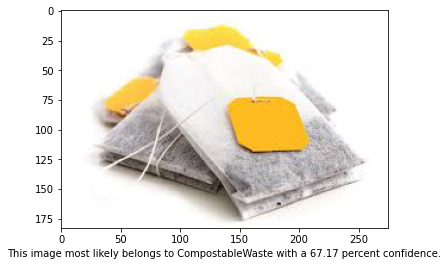

In [ ]:
from google.colab import files
uploads = files.upload()

from keras.preprocessing.image import load_img
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
from keras.preprocessing.image import save_img

for file in uploads.keys() :
  # load the image 
 img = load_img(file,target_size=IMAGE_SHAPE ) 
  # convert image to a numpy array
 img_array = img_to_array(img)
 img_array = tf.expand_dims(img_array, 0)
 img_array = img_array/255
 # load the image to confirm it was saved correctly
 img = load_img(file)
 plt.imshow(img)
 print(type(img))
 print(img.format)
 print(img.mode)
 print(img.size)
#  print(img_array)
 img.show()
 predictions = reloaded.predict(img_array)
 score = tf.nn.softmax(predictions[0])
 plt.xlabel("This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score)))
#  print(
#     "This image most likely belongs to {} with a {:.2f} percent confidence."
#     .format(class_names[np.argmax(score)], 100 * np.max(score))
# )

In [ ]:
# convert the model to TFLite
!mkdir "tflite_models"
TFLITE_MODEL = "tflite_models/trash_model.tflite"


# Get the concrete function from the Keras model.
run_model = tf.function(lambda x : reloaded(x))

# Save the concrete function.
concrete_func = run_model.get_concrete_function(
    tf.TensorSpec(reloaded.inputs[0].shape, reloaded.inputs[0].dtype)
)

# Convert the model to standard TensorFlow Lite model
converter = tf.lite.TFLiteConverter.from_concrete_functions([concrete_func])
converted_tflite_model = converter.convert()
open(TFLITE_MODEL, "wb").write(converted_tflite_model)

11553420

In [ ]:
# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

In [ ]:
# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [ ]:
# Test the TensorFlow Lite model on random input data.
input_shape = input_details[0]['shape']
inputs, outputs = [], []
for _ in range(100):
    input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)
    interpreter.set_tensor(input_details[0]['index'], input_data)
    
    interpreter.invoke()
    tflite_results = interpreter.get_tensor(output_details[0]['index'])
    
    # Test the TensorFlow model on random input data.
    tf_results = model(tf.constant(input_data))
    output_data = np.array(tf_results)
    
    inputs.append(input_data[0][0])
    outputs.append(output_data[0][0])